# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from pandas.io.parsers import read_csv

# Import the signnames
signnames = read_csv("./signnames.csv").values[:, 1]

# Fill this in based on where you saved the training and testing data
data_directory = './traffic-signs-data/'
training_file = data_directory + 'train.p'
validation_file= data_directory + 'valid.p'
testing_file = data_directory + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import math
import random

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples.
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[7].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

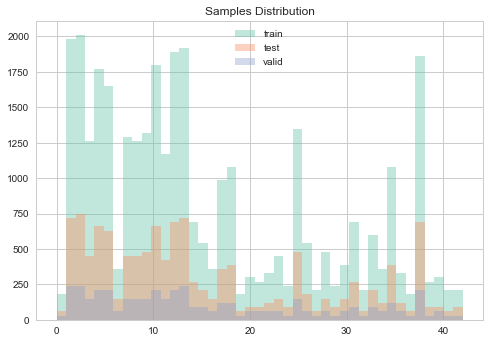

In [3]:
# Imports for Visualisations will be shown in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Set the styles for the visualisations
sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set2")

def plot_sample_distribution(dataset, dataset_label, title, kde=False):
    plt.title(title)
    sns.distplot(dataset, bins=n_classes, kde=kde, label=dataset_label)
    plt.legend();
    
title = "Samples Distribution"
plot_sample_distribution(y_train, "train", title)
plot_sample_distribution(y_test, "test", title)
plot_sample_distribution(y_valid, "valid", title)

/Users/saffie/anaconda/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


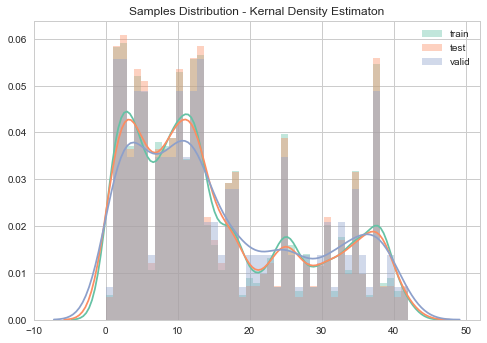

In [4]:
title = "Samples Distribution - Kernal Density Estimaton"
plot_sample_distribution(y_train, "train", title, True)
plot_sample_distribution(y_test, "test", title, True)
plot_sample_distribution(y_valid, "valid", title, True)

### View a random sample of images 

In [5]:
# Select a random subset of 25 images
random_set = np.arange(y_train.shape[0])
np.random.shuffle(random_set)
sample_images = random_set[:25]

print("Random sample created: ")
print(len(sample_images))

Random sample created: 
25


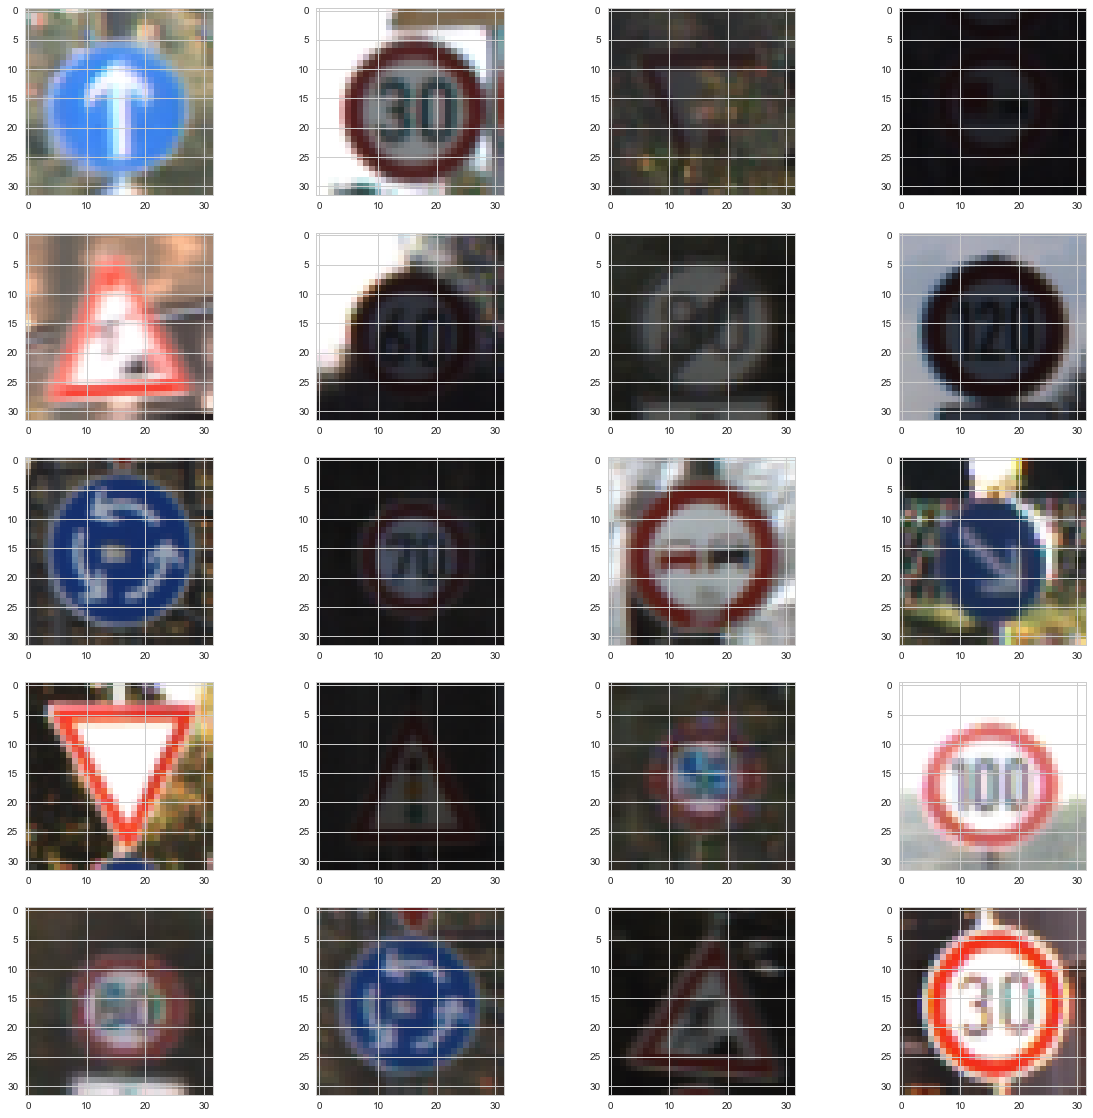

In [6]:
# Visualise a random set of 20 images
rows, columns = 5, 4

def plot_sample_images(training_set):    
    fig, axarr = plt.subplots(5,4, figsize=(20, 20))
    for rows in range(5):
        for columns in range(4):
            axarr[rows, columns].imshow(training_set[sample_images[columns+5*rows]])
            plt.setp(axarr[rows, columns].get_xticklabels(), visible=True)
            plt.setp(axarr[rows, columns].get_yticklabels(), visible=True)
    plt.show()

plot_sample_images(X_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Apply normalisation
# Save the starting conditions for comparison against the pre-processing output
X_train_original = X_train
X_valid_original = X_valid
X_test_original = X_test

## Normalise the datasets: ((image - image.mean) / (image.max - image.min)
def normalise(data_set):
    return (data_set - data_set.mean()) / (np.max(data_set) - np.min(data_set))

X_train = normalise(X_train)
X_valid = normalise(X_valid)
X_test = normalise(X_test)

print(X_train[7].shape)


(32, 32, 3)


### Observe the changes with the proprocessing

Normalised Sample Set:


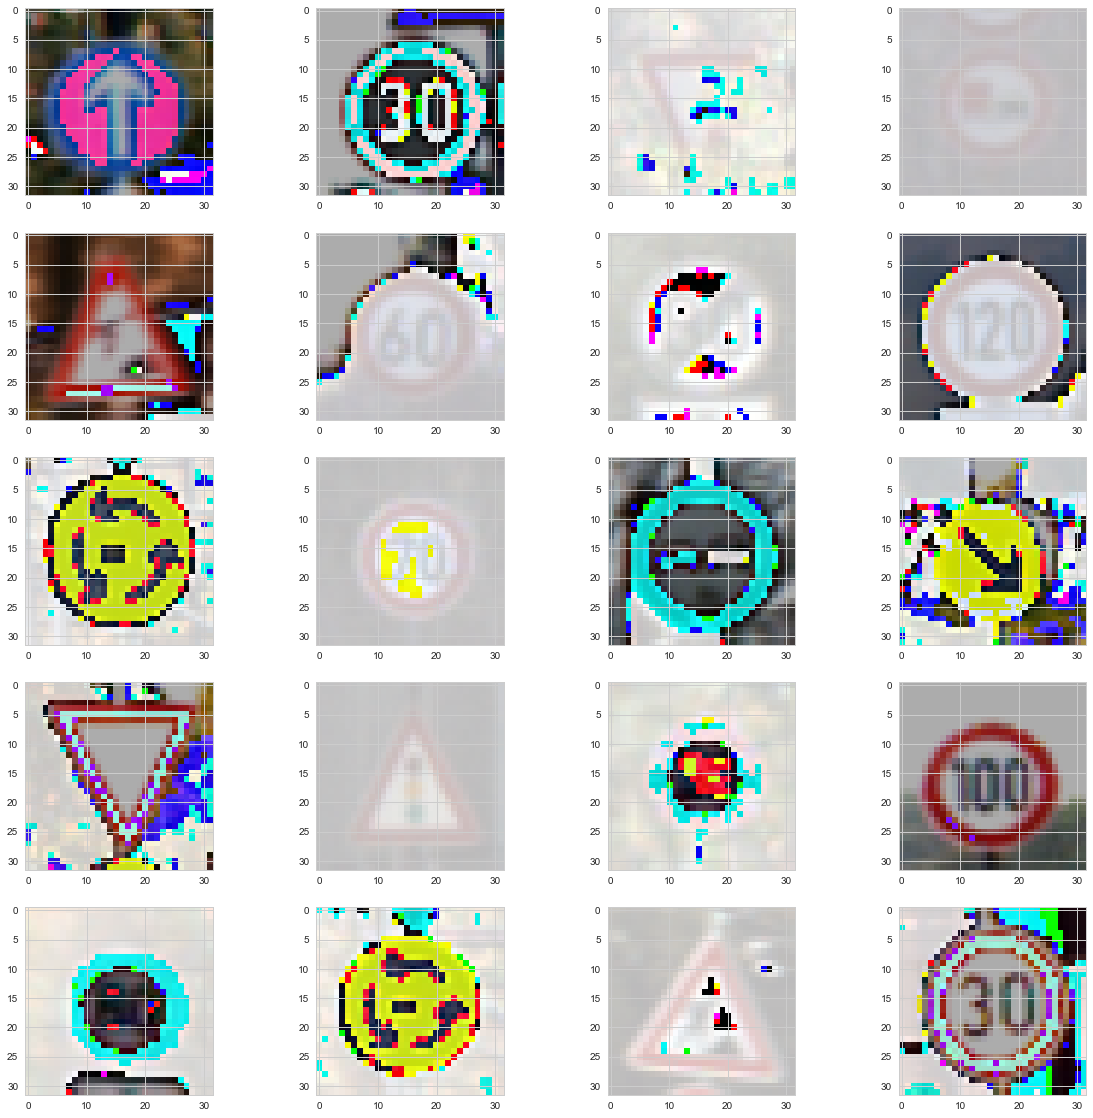

In [8]:
### Observe the differences on the same image
print("Normalised Sample Set:")
plot_sample_images(X_train)
# print("Original Sample Set:")
# plot_sample_images(X_train_original)

/Users/saffie/anaconda/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


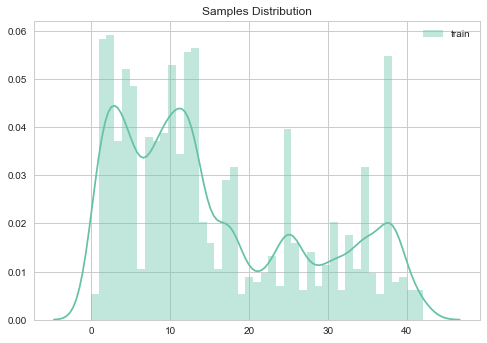

In [9]:
title = "Samples Distribution"
plot_sample_distribution(y_train, "train", title, True)

### Shuffle the training data

In [10]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Set-up TensorFlow

In [11]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

### Model Architecture

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels
Train the network to classify TrafficSign data.

x is a placeholder for a batch of images, y is a placeholder for a batch of output labels.

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline
Create a training pipeline that uses the model to classify TrafficSign Data.

In [14]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model is for a given dataset.

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

### Train the model
- Run the training data through the training pipeline to train the model
- Before each epoch, shuffle the training set
- After each epoch, measure the loss and accuracy of the validation set
- Save the model after training

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, './traffic-signs')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.734
Train Accuracy = 0.819

EPOCH 2 ...
Validation Accuracy = 0.845
Train Accuracy = 0.936

EPOCH 3 ...
Validation Accuracy = 0.853
Train Accuracy = 0.952

EPOCH 4 ...
Validation Accuracy = 0.879
Train Accuracy = 0.974

EPOCH 5 ...
Validation Accuracy = 0.885
Train Accuracy = 0.977

EPOCH 6 ...
Validation Accuracy = 0.898
Train Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.907
Train Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.894
Train Accuracy = 0.989

EPOCH 9 ...
Validation Accuracy = 0.905
Train Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.898
Train Accuracy = 0.992

EPOCH 11 ...
Validation Accuracy = 0.912
Train Accuracy = 0.993

EPOCH 12 ...
Validation Accuracy = 0.905
Train Accuracy = 0.991

EPOCH 13 ...
Validation Accuracy = 0.914
Train Accuracy = 0.995

EPOCH 14 ...
Validation Accuracy = 0.919
Train Accuracy = 0.991

EPOCH 15 ...
Validation Accuracy = 0.924
Train Accuracy = 0.997

EPOCH 16 ...
Validati

### Evaluate the Model
Evaluates the performance of the model on the test set.

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

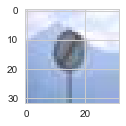

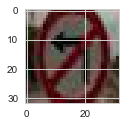

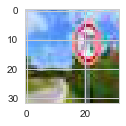

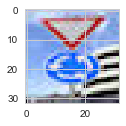

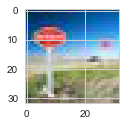

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import pylab
import os

new_images = os.listdir("traffic-signs-data/new_images/")
new_image_labels = [32, 36, 4, 40, 14]
# Create new image data array
directory = "traffic-signs-data/new_images/"
new_image_data = []
for image_name in new_images:
    image = mpimg.imread(directory + image_name)
    new_image_data.append(image)
    
# Plot new images 
def plot_new_images(image_dataset):
    for image in image_dataset:    
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(5, 1, 1)
        ax.imshow(image)
        plt.show()
        
plot_new_images(new_image_data)

### Predict the Sign Type for Each Image

### 1. Preprocess new images

Normalised New Image Set:


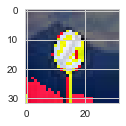

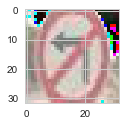

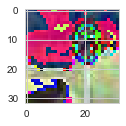

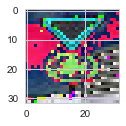

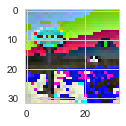

Original New Image Set:


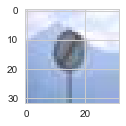

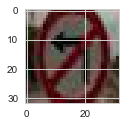

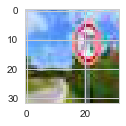

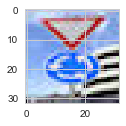

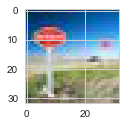

In [26]:
### Make new image data into the correct format (numpy array)
X_new_image_data = np.array(new_image_data)

### Apply normalisation
# Save the starting conditions for comparison against the pre-processing output
X_new_image_data_original = X_new_image_data

## Normalise the datasets: ((image - image.mean) / (image.max - image.min)
X_new_image_data = normalise(X_new_image_data)

## Create new_image_labels as numpy array
y_new_image_labels = np.array(new_image_labels)

### Observe the differences on the same image
print("Normalised New Image Set:")
plot_new_images(X_new_image_data)
print("Original New Image Set:")
plot_new_images(X_new_image_data_original)

### Run the existing training model against new image data

In [27]:
prediction_operation = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_predictions = sess.run(prediction_operation, feed_dict={x: X_new_image_data})

### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_accuracy = evaluate(X_new_image_data, y_new_image_labels)

print("New Accuracy = {:.3f}".format(new_accuracy))   

New Accuracy = 0.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    y_top_5 = sess.run(tf.nn.top_k(y_predictions, k=5, sorted=True))
    y_top_sm = sess.run(tf.nn.softmax(y_top_5[0]))

y_top_5_sm = [y_top_sm ,y_top_5[1]]
print(y_top_5_sm)

[array([[ 0.3521353 ,  0.17273335,  0.15927175,  0.15833339,  0.15752624],
       [ 0.40460932,  0.14884785,  0.14884765,  0.14884765,  0.14884765],
       [ 0.2830826 ,  0.2413003 ,  0.15854041,  0.15853864,  0.15853807],
       [ 0.31536779,  0.21144035,  0.15862012,  0.15728587,  0.15728585],
       [ 0.40460971,  0.14884759,  0.14884759,  0.14884759,  0.14884759]], dtype=float32), array([[40,  6,  5, 12, 11],
       [ 1,  4, 12,  8, 38],
       [33, 26, 30, 39, 37],
       [ 2,  5, 40,  1, 11],
       [13, 14, 33, 26, 15]], dtype=int32)]


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 